In [28]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import os, re

In [29]:
alignment_data_dir = '/Users/6j9/projects/human_mouse_skin/qc/alignment'
fastqc_data_dir = '/Users/6j9/projects/human_mouse_skin/qc/fastqc'
plot_dir = '/Users/6j9/projects/human_mouse_skin/plots/alignment'

# Alignment Plot

In [30]:
align_data_paths = []
author_names = []
for r, d, f in os.walk(alignment_data_dir):
    for path in f:
        if 'general_stats' in path:
            full_path = os.path.join(r, path)
            author_name = re.search('alignment\/([a-z0-9\-\_\.]+)\/', full_path).group(1)
            align_data_paths.append(full_path)
            author_names.append(author_name)

In [31]:
align_data = []
for path in align_data_paths:
    align_data.append(pd.read_csv(path, sep='\t', header=0, index_col=None))

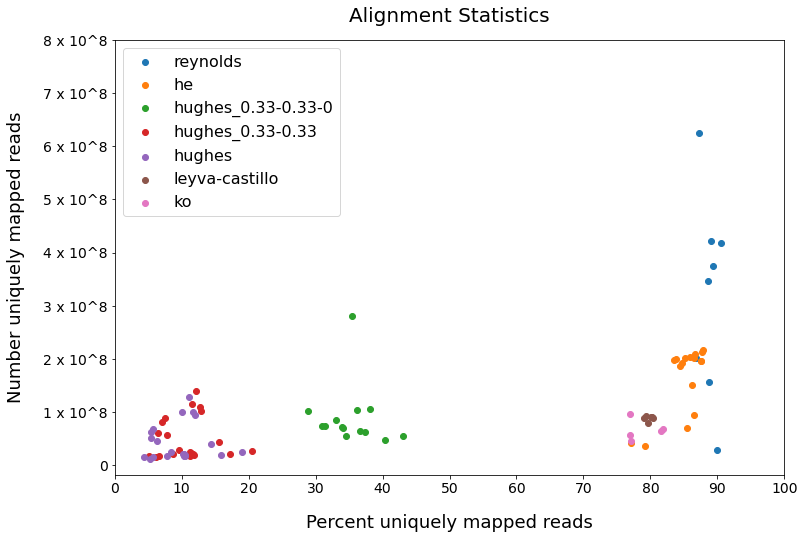

In [32]:
save = True
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Alignment Statistics', size=20, pad=18)
ax.set_xlabel('Percent uniquely mapped reads', size=18, labelpad=18)
ax.set_ylabel('Number uniquely mapped reads', size=18, labelpad=18)

for i, data in enumerate(align_data):
    mapped_pct = data.loc[:, 'STAR_mqc-generalstats-star-uniquely_mapped_percent'].values
    mapped_uniq = data.loc[:, 'STAR_mqc-generalstats-star-uniquely_mapped'].values
    ax.scatter(mapped_pct, mapped_uniq, label=author_names[i])

x_ticks = np.arange(0, 110, 10)
ax.set_xticks(x_ticks)
ax.set_xticklabels([str(tick) for tick in x_ticks], size=14)

y_ticks = np.arange(0, 900000000, 100000000)
ax.set_yticks(y_ticks)
yticklabels = [0] + [str(x) + ' x 10^8' for x in np.arange(1, 9, 1)]
ax.set_yticklabels(yticklabels, size=14)

ax.legend(fontsize=16)
if save:
    out_path = os.path.join(plot_dir, 'alignment_stats.png')
    plt.savefig(out_path, dpi=300)

# Fastqc Plot

In [81]:
fastqc_data_paths = []
author_names = []
for r, d, f in os.walk(fastqc_data_dir):
    for path in f:
        if 'per_base_sequence_quality_plot_1.txt' in path:
            full_path = os.path.join(r, path)
            author_name = re.search('fastqc\/([a-z\-]+)\/', full_path).group(1)
            fastqc_data_paths.append(full_path)
            author_names.append(author_name)

In [174]:
fastqc_data = []
for path in fastqc_data_paths:
    data = []
    with open(path, 'r') as in_file:
        for i, line in enumerate(in_file):
            if i % 4 == 3:
                data.append(line.strip().split('\t')[1:])
    num_samples = len(data)
    fastqc_data.append(pd.DataFrame(data=data))

In [175]:
fastqc_data[0]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,36.09048753875426,35.741336974089904,35.622613174530294,35.68358368273177,35.65687931254451,35.66510768567574,35.59423980341762,35.60741161060655,35.59289437659832,35.564779815905695,...,34.67825140446443,34.62404533200373,34.57429142423781,34.516122612908,34.48253788624548,34.44963844014181,34.4199606353709,34.30765707203993,34.29013421928552,34.045811101310505
1,36.17417473528888,35.95215121376061,35.9046205150423,35.96003760527814,35.928716389814106,35.968270921736135,35.9192130322915,35.932213225039774,35.91371753152306,35.900332819869114,...,35.080375599166615,35.037785536173246,34.99815551914532,34.9251189446461,34.88527644630228,34.85347769431731,34.807385975017006,34.713038675074,34.680496414931305,34.32294110486962
2,36.10586367825997,35.882603015529874,35.84111500387728,35.89712728126653,35.86651916144985,35.905125150946326,35.85522451447623,35.866347954054454,35.85012443417215,35.83458435839735,...,35.09110644255365,35.044692554527174,35.00502497950142,34.93026815357111,34.88767424792676,34.85367080235527,34.805410829023714,34.70471749582672,34.67386101130107,34.29627370380411
3,36.11873438730777,35.884758695533534,35.8490322876072,35.90743808252516,35.872984503026515,35.90959886676037,35.85472991136158,35.86959665780025,35.85371359072494,35.8401020609232,...,34.81954240240814,34.76982849940023,34.72265043750769,34.64158295474032,34.599112673792995,34.56193914637771,34.51220598669189,34.4082941749928,34.37163960306093,34.00914318166381
4,36.10353298040965,35.90461068482129,35.857920350755855,35.9092327643864,35.877028156474445,35.914439086412756,35.86819521203332,35.87905954934278,35.86125415477909,35.84816563766761,...,35.182746984725554,35.14043295430644,35.10449006798517,35.031770527209666,34.99469588002481,34.96575446335548,34.922762964604814,34.82584924191663,34.7982822080521,34.425825445923195


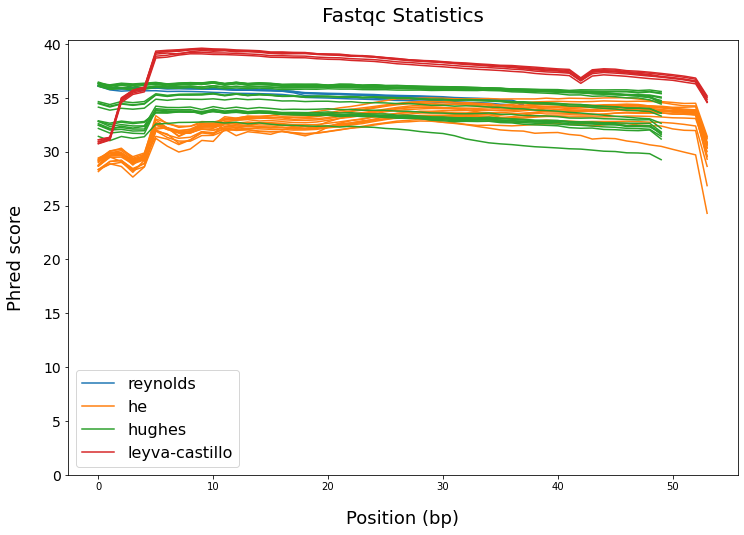

In [179]:
save = False
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Fastqc Statistics', size=20, pad=18)
ax.set_xlabel('Position (bp)', size=18, labelpad=18)
ax.set_ylabel('Phred score', size=18, labelpad=18)

for i, data in enumerate(fastqc_data):
    color = cmap(i)
    for j in range(data.shape[0]):
        line = data.iloc[j, :].values.astype(float)
        x = np.arange(len(line))
        ax.plot(x, line, color=color)
    ax.plot([],[], color=color, label=author_names[i])



#x_ticks = np.arange(0, 110, 10)
#ax.set_xticks(x_ticks)
#ax.set_xticklabels([str(tick) for tick in x_ticks], size=14)

y_ticks = np.arange(0, 45, 5)
ax.set_yticks(y_ticks)
ax.set_yticklabels([str(tick) for tick in y_ticks], size=14)
#yticklabels = [0] + [str(x) + ' x 10^8' for x in np.arange(1, 9, 1)]
#ax.set_yticklabels(yticklabels, size=14)

ax.legend(fontsize=16)
if save:
    out_path = os.path.join(plot_dir, 'alignment_stats.png')
    plt.savefig(out_path, dpi=300)
    
#plt.plot()
